# Understanding the data

id: unique identifier

gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married: "No" or "Yes"

work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

Residence_type: "Rural" or "Urban"

avg_glucose_level: average glucose level in blood

bmi: body mass index

smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

stroke: 1 if the patient had a stroke or 0 if not

Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import re
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Data Cleaning

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
2,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
list(df.keys())

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

#### Column names in dataset

df.replace('Unknown', np.nan)

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Checking for null values in dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Categorical : gender, ever_married, work_type, residence_type, smoking_status

Numerical : age, hypertension, heart_disease, avg_glucose_level, bmi

hypertension & heart_disease have int dtypes, but we can check out that they are in categorical style

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


#### Body mass index (BMI) is defined as person's weight measurement into proportion to his/her weight. In other words, it is obtained by dividing the person's weight by the square of his/her height. BMI = body weight (kg) / (height(m) x height(m))

In [9]:
df["bmi"].fillna(df["bmi"].median(), inplace=True)

#### Fill in NA in BMI column with the median.

In [10]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df = df.drop("id", axis=1)
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
2,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0


# Exploring the Data

<AxesSubplot:>

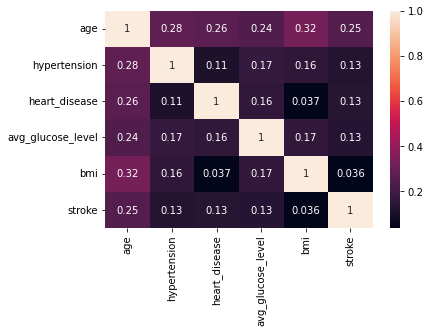

In [12]:
sns.heatmap(df.corr(),annot=True)

# Data Visualization

### Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

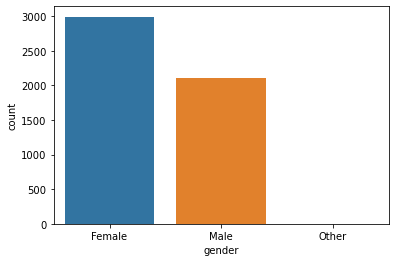

In [13]:
#plot a count plot that help to see count of values for each unique category.(gender plot)
sns.countplot(data=df, x='gender')

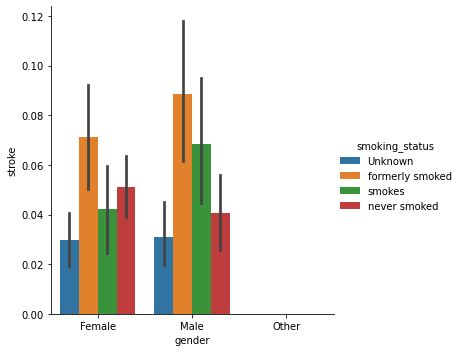

In [14]:
#by ploting this we can see how gender can affect stroke in relationship by smoking status.
sns.catplot(x="gender", y="stroke", hue="smoking_status", kind="bar", data=df)

### AGE

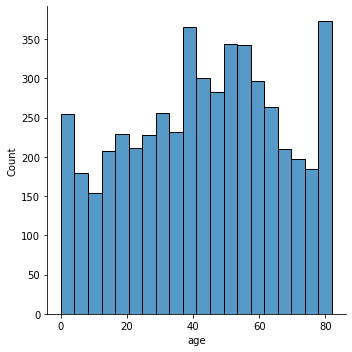

In [15]:
#by this plot we can see the distribution of variable age.
sns.displot(df['age'])

<AxesSubplot:xlabel='stroke', ylabel='age'>

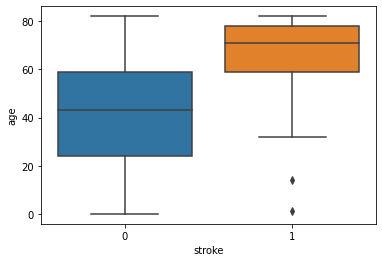

In [16]:
#plot the boxplot of variable age with respect to stroke.
sns.boxplot(data=df,x='stroke', y='age')

### Hypertension

#### Hypertension is a condition when a person has high blood pressue which can casue stroke.

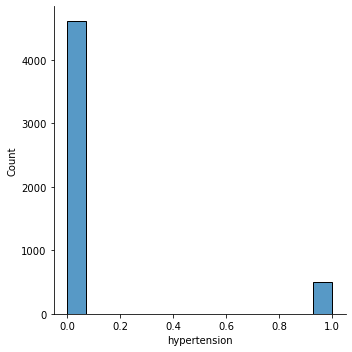

In [17]:
sns.displot(df['hypertension'])

<AxesSubplot:xlabel='hypertension', ylabel='count'>

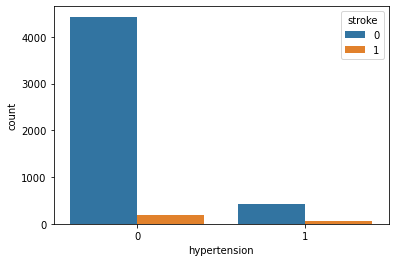

In [18]:
sns.countplot(data=df,x='hypertension',hue='stroke')

### Heart Disease

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

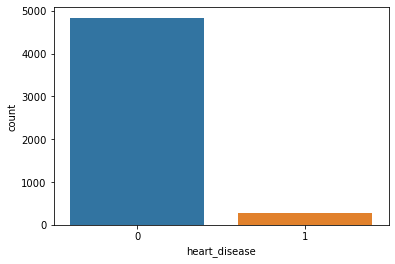

In [19]:
#plot counter plot of hear disease feature
sns.countplot(data=df,x='heart_disease')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

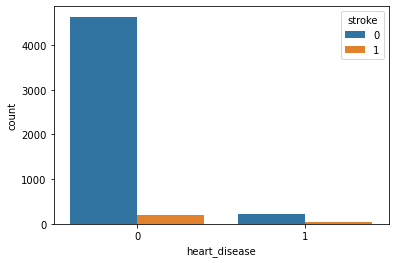

In [20]:
sns.countplot(data=df,x='heart_disease',hue='stroke')

### Marriage status

<AxesSubplot:xlabel='ever_married', ylabel='count'>

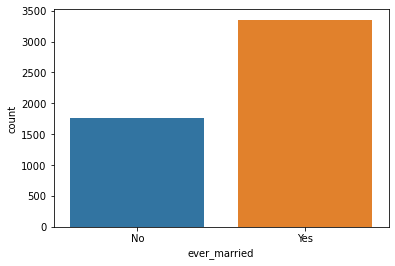

In [21]:
#plot counter plot of ever married feature
sns.countplot(data=df, x='ever_married')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

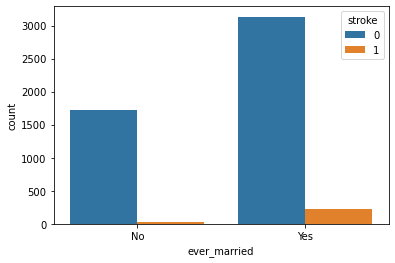

In [22]:
#plot counter plot of ever married feature against stroke
sns.countplot(data=df, x='ever_married', hue='stroke')

### Work type

<AxesSubplot:xlabel='work_type', ylabel='count'>

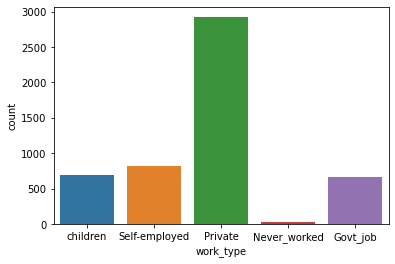

In [23]:
#plot counter plot of work type feature
sns.countplot(data=df, x='work_type')

<AxesSubplot:xlabel='work_type', ylabel='count'>

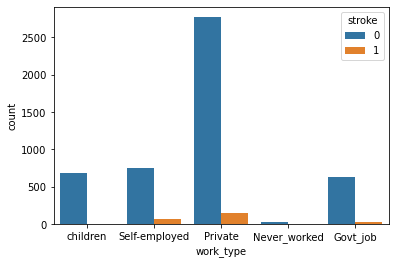

In [24]:
#plot counter plot of work type feature against stroke
sns.countplot(data=df, x='work_type', hue='stroke')

### Residential Type

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

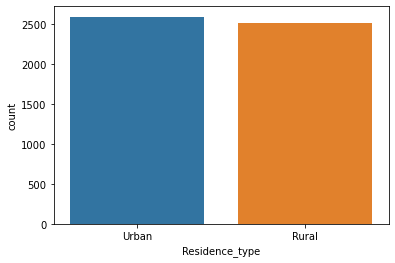

In [25]:
#plot counter plot of work type feature
sns.countplot(data=df, x='Residence_type')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

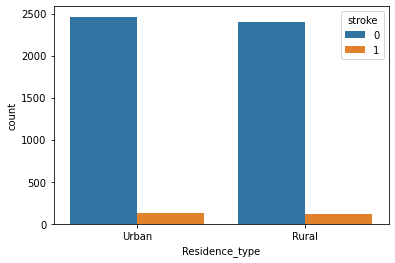

In [26]:
#plot counter plot of work type feature
sns.countplot(data=df, x='Residence_type', hue='stroke')

### Average Glucose Level

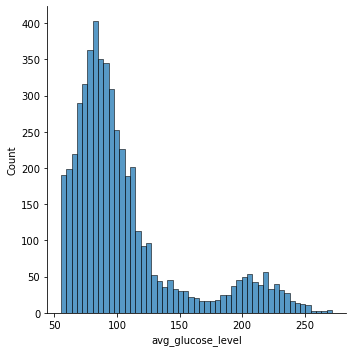

In [27]:
#by ploting it we can see the distribution of average Glucose level
sns.displot(df['avg_glucose_level'])

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

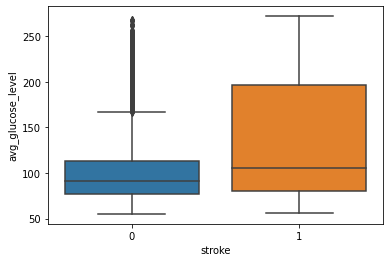

In [28]:
# plot the box plot of Glucose feature with target variable of stroke
sns.boxplot(data=df, x='stroke', y='avg_glucose_level')

### BMI 

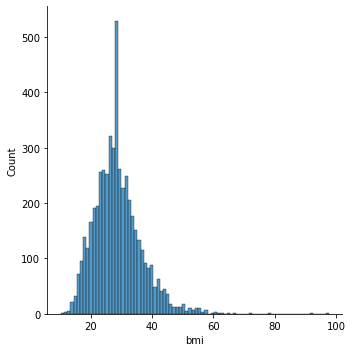

In [29]:
#distribution of bmi
sns.displot(df["bmi"])

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

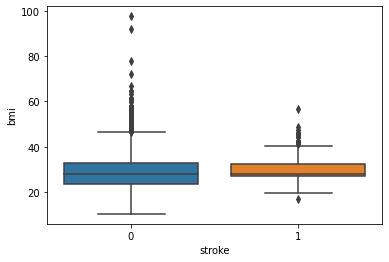

In [30]:
# plot the box plot of bmi feature with target variable of stroke
sns.boxplot(data=df, x='stroke', y='bmi')

### Smoking Status

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

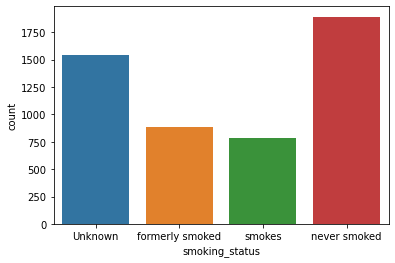

In [31]:
#plot counter plot of work type feature
sns.countplot(data=df, x='smoking_status')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

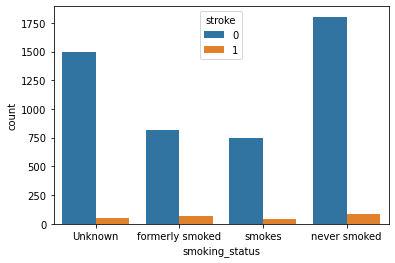

In [32]:
sns.countplot(data=df,x='smoking_status',hue="stroke")

### Stroke

<AxesSubplot:xlabel='stroke', ylabel='count'>

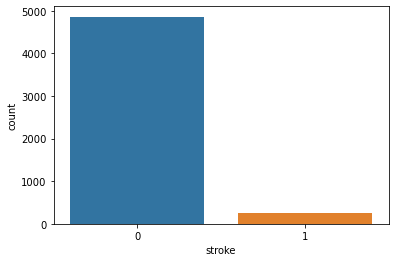

In [33]:
# by ploting it we can see the plot of people who had stroke and not having a stroke
sns.countplot(data=df,x='stroke')

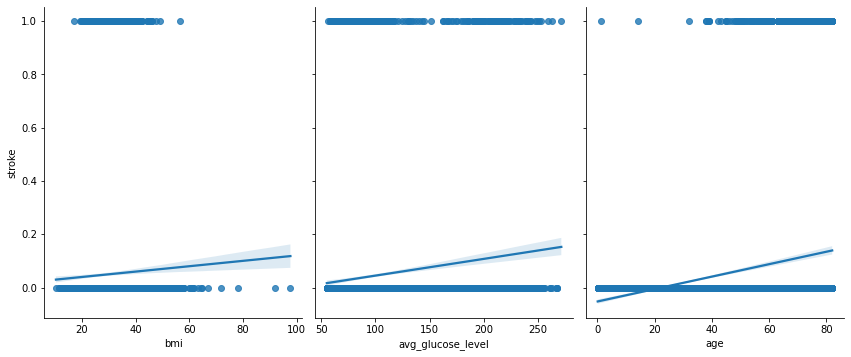

In [34]:
sns.pairplot(df, x_vars=["bmi", "avg_glucose_level",'age'], y_vars=["stroke"],
             height=5, aspect=.8, kind="reg");

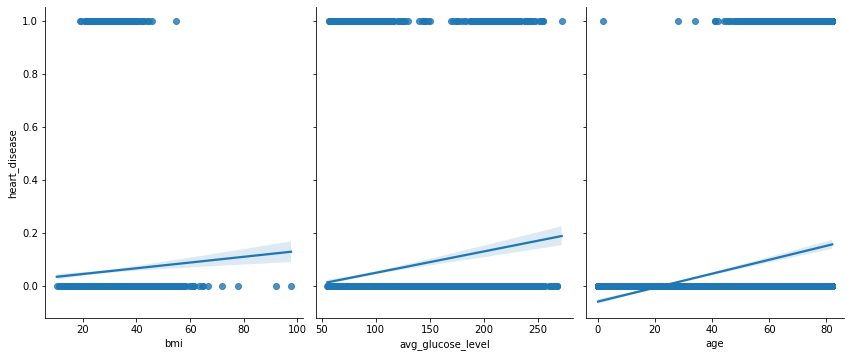

In [35]:
sns.pairplot(df, x_vars=["bmi", "avg_glucose_level",'age'], y_vars=["heart_disease"],
             height=5, aspect=.8, kind="reg");

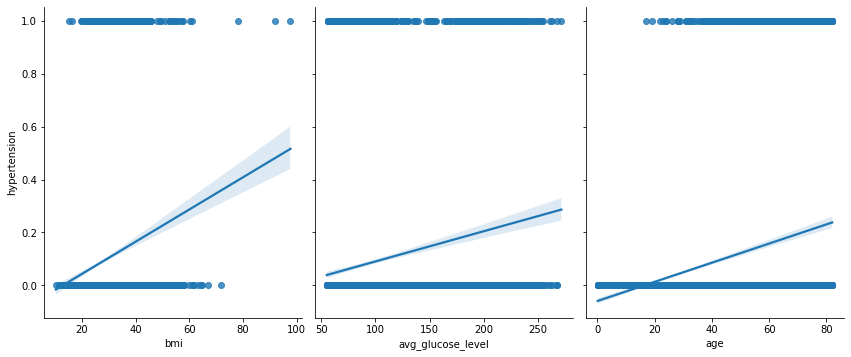

In [36]:
sns.pairplot(df, x_vars=["bmi", "avg_glucose_level",'age'], y_vars=["hypertension"],
             height=5, aspect=.8, kind="reg");

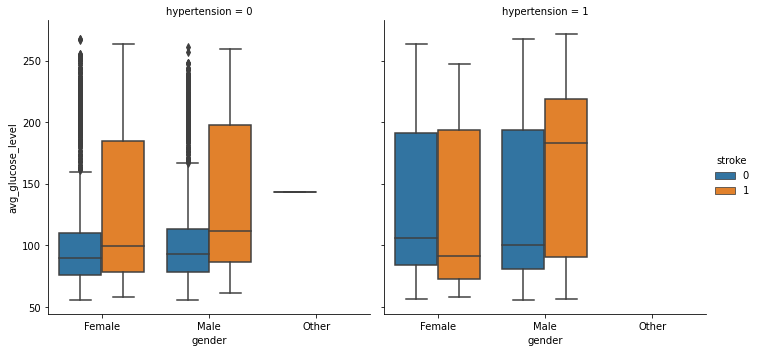

In [37]:
sns.catplot(x="gender", y="avg_glucose_level",
                hue="stroke", col="hypertension",
                data=df, kind="box");

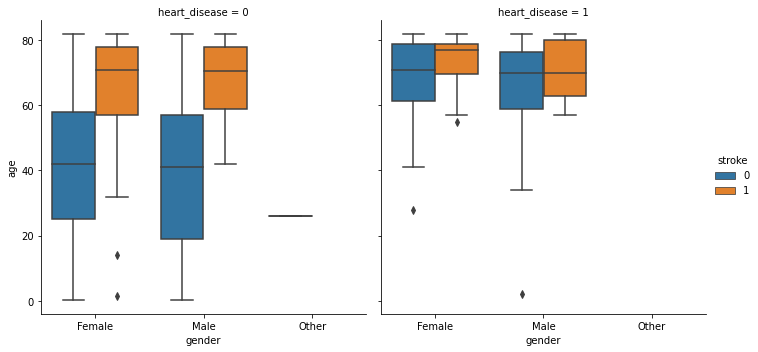

In [38]:
sns.catplot(x="gender", y="age",
                hue="stroke", col="heart_disease",
                data=df, kind="box");

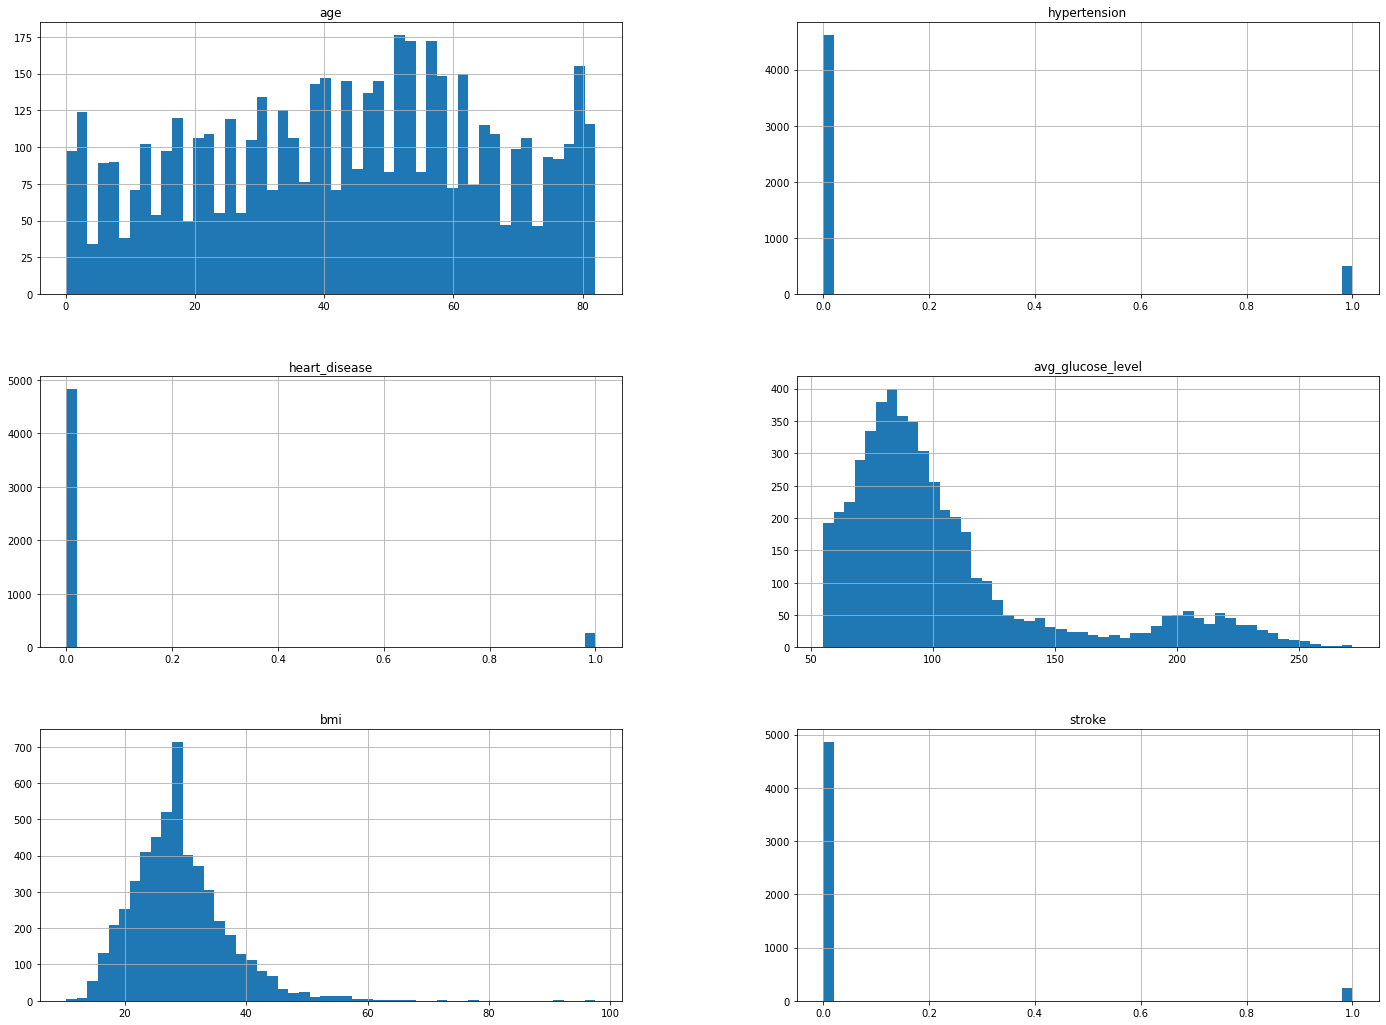

In [39]:
df.hist(bins=50, figsize=(24,18)) # bins is number of groups of values
plt.show()

/Users/kch/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


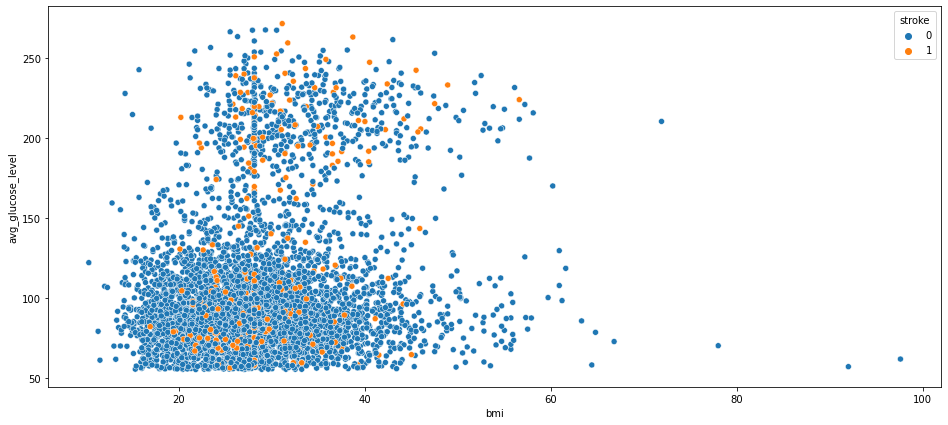

In [40]:
plt.figure(figsize=(16,7))
sns.scatterplot(df["bmi"], df["avg_glucose_level"], hue=df["stroke"])
plt.show()

/Users/kch/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


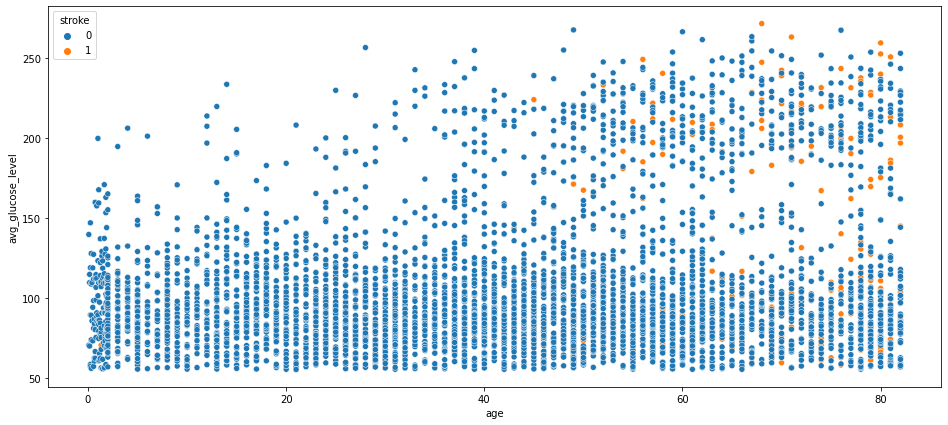

In [41]:
plt.figure(figsize=(16,7))
sns.scatterplot(df["age"], df["avg_glucose_level"], hue=df["stroke"])
plt.show()

## Encoding 

In [42]:
set(df.gender)

{'Female', 'Male', 'Other'}

#### Identify the unique elements in gender column for encoding. 

In [43]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [44]:
#We only have 1 "other" gender so we can remove it 
df = df[df.gender != 'Other']

In [45]:
df=pd.get_dummies(df,columns=["gender"])

In [46]:
df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male
0,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0,1,0
1,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0,0,1
2,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0,0,1
3,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0,0,1
4,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,82.00,0,0,No,Private,Rural,96.98,21.5,never smoked,0,1,0
5106,82.00,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0,0,1
5107,82.00,0,0,Yes,Self-employed,Urban,113.45,30.3,never smoked,0,1,0
5108,82.00,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0,1,0


In [47]:
set(df.ever_married)

{'No', 'Yes'}

In [48]:
df.ever_married.value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [49]:
df=pd.get_dummies(df,columns=["ever_married"])

In [50]:
df

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes
0,0.08,0,0,children,Urban,139.67,14.1,Unknown,0,1,0,1,0
1,0.08,0,0,children,Rural,70.33,16.9,Unknown,0,0,1,1,0
2,0.16,0,0,children,Urban,114.71,17.4,Unknown,0,0,1,1,0
3,0.16,0,0,children,Rural,69.79,13.0,Unknown,0,0,1,1,0
4,0.16,0,0,children,Urban,109.52,13.9,Unknown,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,82.00,0,0,Private,Rural,96.98,21.5,never smoked,0,1,0,1,0
5106,82.00,0,0,Private,Urban,217.57,33.5,formerly smoked,0,0,1,0,1
5107,82.00,0,0,Self-employed,Urban,113.45,30.3,never smoked,0,1,0,0,1
5108,82.00,0,0,Self-employed,Rural,211.58,36.9,never smoked,0,1,0,0,1


In [51]:
set(df.work_type)

{'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'}

In [52]:
df.work_type.value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [53]:
df=pd.get_dummies(df,columns=["work_type"])

In [54]:
df

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0.08,0,0,Urban,139.67,14.1,Unknown,0,1,0,1,0,0,0,0,0,1
1,0.08,0,0,Rural,70.33,16.9,Unknown,0,0,1,1,0,0,0,0,0,1
2,0.16,0,0,Urban,114.71,17.4,Unknown,0,0,1,1,0,0,0,0,0,1
3,0.16,0,0,Rural,69.79,13.0,Unknown,0,0,1,1,0,0,0,0,0,1
4,0.16,0,0,Urban,109.52,13.9,Unknown,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,82.00,0,0,Rural,96.98,21.5,never smoked,0,1,0,1,0,0,0,1,0,0
5106,82.00,0,0,Urban,217.57,33.5,formerly smoked,0,0,1,0,1,0,0,1,0,0
5107,82.00,0,0,Urban,113.45,30.3,never smoked,0,1,0,0,1,0,0,0,1,0
5108,82.00,0,0,Rural,211.58,36.9,never smoked,0,1,0,0,1,0,0,0,1,0


In [55]:
set(df.Residence_type)

{'Rural', 'Urban'}

In [56]:
df.Residence_type.value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [57]:
df=pd.get_dummies(df,columns=["Residence_type"])

In [58]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,0.08,0,0,139.67,14.1,Unknown,0,1,0,1,0,0,0,0,0,1,0,1
1,0.08,0,0,70.33,16.9,Unknown,0,0,1,1,0,0,0,0,0,1,1,0
2,0.16,0,0,114.71,17.4,Unknown,0,0,1,1,0,0,0,0,0,1,0,1
3,0.16,0,0,69.79,13.0,Unknown,0,0,1,1,0,0,0,0,0,1,1,0
4,0.16,0,0,109.52,13.9,Unknown,0,0,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,82.00,0,0,96.98,21.5,never smoked,0,1,0,1,0,0,0,1,0,0,1,0
5106,82.00,0,0,217.57,33.5,formerly smoked,0,0,1,0,1,0,0,1,0,0,0,1
5107,82.00,0,0,113.45,30.3,never smoked,0,1,0,0,1,0,0,0,1,0,0,1
5108,82.00,0,0,211.58,36.9,never smoked,0,1,0,0,1,0,0,0,1,0,1,0


In [59]:
set(df.smoking_status)

{'Unknown', 'formerly smoked', 'never smoked', 'smokes'}

In [60]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [61]:
df=pd.get_dummies(df,columns=["smoking_status"])

In [62]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.08,0,0,139.67,14.1,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
1,0.08,0,0,70.33,16.9,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
2,0.16,0,0,114.71,17.4,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,0
3,0.16,0,0,69.79,13.0,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
4,0.16,0,0,109.52,13.9,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,82.00,0,0,96.98,21.5,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5106,82.00,0,0,217.57,33.5,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
5107,82.00,0,0,113.45,30.3,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5108,82.00,0,0,211.58,36.9,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5109 non-null   float64
 1   hypertension                    5109 non-null   int64  
 2   heart_disease                   5109 non-null   int64  
 3   avg_glucose_level               5109 non-null   float64
 4   bmi                             5109 non-null   float64
 5   stroke                          5109 non-null   int64  
 6   gender_Female                   5109 non-null   uint8  
 7   gender_Male                     5109 non-null   uint8  
 8   ever_married_No                 5109 non-null   uint8  
 9   ever_married_Yes                5109 non-null   uint8  
 10  work_type_Govt_job              5109 non-null   uint8  
 11  work_type_Never_worked          5109 non-null   uint8  
 12  work_type_Private               51

In [64]:
df.shape

(5109, 21)

### Correlation

<AxesSubplot:>

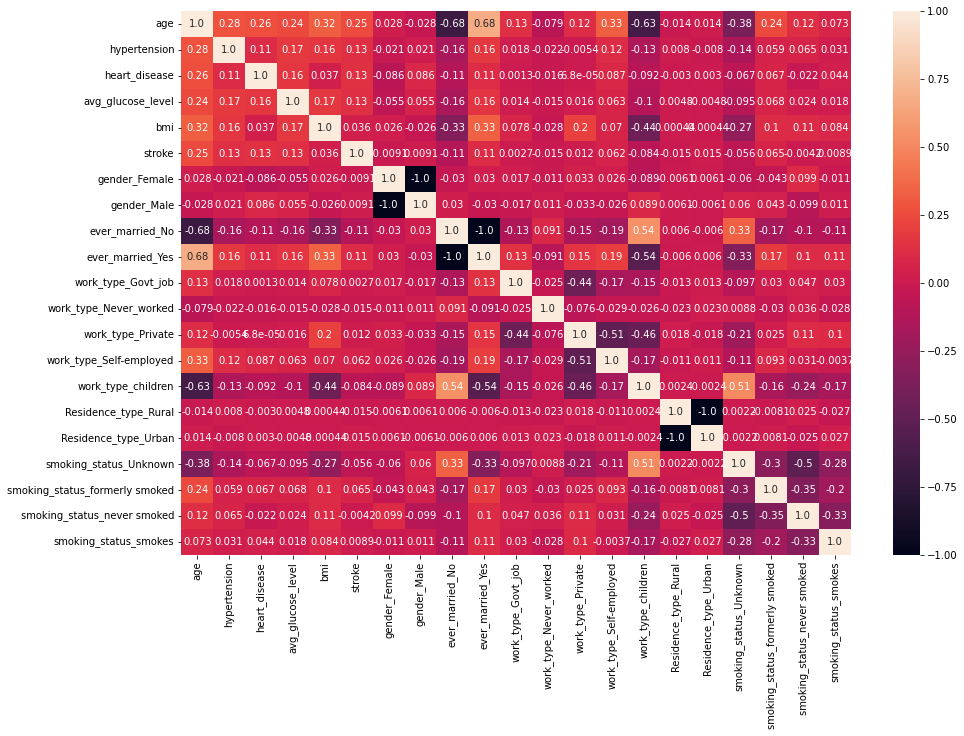

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2')

### Finding what features have more correlation with stroke

In [66]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(df.drop('stroke',axis=1),df['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(df.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
0,age,326.799849
2,heart_disease,94.666779
3,avg_glucose_level,90.550026
1,hypertension,84.919947
8,ever_married_Yes,60.609558
7,ever_married_No,60.609558
13,work_type_children,36.194030
17,smoking_status_formerly smoked,21.456849
12,work_type_Self-employed,19.803145
16,smoking_status_Unknown,16.021938


In [67]:
important_cols=fscores[fscores['Score']>50]['Attribute']
print(important_cols)

0                  age
1         hypertension
2        heart_disease
3    avg_glucose_level
7      ever_married_No
8     ever_married_Yes
Name: Attribute, dtype: object


# Separate the Target Column from the Rest of the Dataset

In [68]:
#drop the y (target) column from the dataset
x=df.drop("stroke",axis=1)

In [69]:
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.08,0,0,139.67,14.1,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0
1,0.08,0,0,70.33,16.9,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0
2,0.16,0,0,114.71,17.4,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0
3,0.16,0,0,69.79,13.0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0
4,0.16,0,0,109.52,13.9,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,82.00,0,0,96.98,21.5,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
5106,82.00,0,0,217.57,33.5,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
5107,82.00,0,0,113.45,30.3,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5108,82.00,0,0,211.58,36.9,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [70]:
x.shape

(5109, 20)

In [71]:
y=df.stroke

In [72]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5109, dtype: int64

In [73]:
print('x\n', x[:10])
print('y\n', y[:10])

x
     age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Female  \
0  0.08             0              0             139.67  14.1              1   
1  0.08             0              0              70.33  16.9              0   
2  0.16             0              0             114.71  17.4              0   
3  0.16             0              0              69.79  13.0              0   
4  0.16             0              0             109.52  13.9              0   
5  0.24             0              0             118.87  16.3              0   
6  0.24             0              0             146.97  18.5              0   
7  0.24             0              0              58.35  18.6              0   
8  0.24             0              0              89.28  14.2              0   
9  0.24             0              0              57.09  19.4              0   

   gender_Male  ever_married_No  ever_married_Yes  work_type_Govt_job  \
0            0                1            

# Separate the Data into Train and Test Sets

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [75]:
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [76]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3831, 20) (1278, 20) (3831,) (1278,)


In [77]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4000,63.0,0,0,196.81,35.9,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3576,57.0,0,0,64.37,32.8,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3033,51.0,1,0,106.22,29.0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0
1868,35.0,0,0,83.27,19.8,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
494,10.0,0,0,97.24,20.2,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,71.0,0,0,144.23,22.1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0
466,9.0,0,0,150.00,17.4,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0
3093,52.0,0,0,107.29,28.1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3773,60.0,0,0,85.60,34.5,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0


In [78]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

# Normalization

In [79]:
#look at normalization again. 
from sklearn.preprocessing import MinMaxScaler

In [80]:
#normalization range between 0-1
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train  = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

## Balancing Data Set with Smote function

conda install -c conda-forge imbalanced-learn

In [81]:
# SMOTE for Imbalanced Classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_resampled, y_resampled  = oversample.fit_resample(X_train, y_train)

In [82]:
X_train, y_train = X_resampled, y_resampled

# Logistic Regression

In [83]:
#import LogisticRegression from Scikit_Learn
from sklearn.linear_model import LogisticRegression

In [84]:
logreg = LogisticRegression()

In [85]:
#fit the train data into model
logreg.fit(X_train,y_train)

LogisticRegression()

In [86]:
y_pred=logreg.predict(X_test)

In [87]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[923, 292],
       [ 21,  42]])

In [88]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy: 0.7550860719874805
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1215
           1       0.13      0.67      0.21        63

    accuracy                           0.76      1278
   macro avg       0.55      0.71      0.53      1278
weighted avg       0.94      0.76      0.82      1278



# Support Vector Machine Model

In [89]:
from sklearn.svm import SVC

In [90]:
#import SVM from Scikit_Learn
model = SVC(random_state =43, kernel = "linear")

In [91]:
#fit the train data into model
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=43)

In [92]:
# predict the label based on the test data
y_predict = model.predict(X_test)
y_predict

array([1, 1, 0, ..., 0, 0, 1])

In [93]:
set(y_predict)

{0, 1}

In [94]:
#confusion matrics
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix (y_test, y_predict)
print(Confusion_matrix)

[[902 313]
 [ 21  42]]


In [95]:
#calculating Accuracy 
from sklearn.metrics import accuracy_score
Accuracy_Score = accuracy_score(y_test, y_predict)
print("Accuracy_Score", Accuracy_Score)

Accuracy_Score 0.7386541471048513


# Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
#n_estimators = # of trees
#max_features = size of the random subsets of features to consider when splitting a node
classifier = RandomForestClassifier(n_estimators=50, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1144   71]
 [  56    7]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1215
           1       0.09      0.11      0.10        63

    accuracy                           0.90      1278
   macro avg       0.52      0.53      0.52      1278
weighted avg       0.91      0.90      0.91      1278

0.9006259780907668


# Implement K Nearest Neighbors

In [98]:
#fit the model

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5)

KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
# Predicting the Test set results

y_pred = KNN.predict(X_test)

In [100]:
# Calculating Accuracy


from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)

Accuracy = "{:.3f}".format(score)

print("Accuracy :", Accuracy)
print(classification_report(y_test, y_pred))

Accuracy : 0.827
              precision    recall  f1-score   support

           0       0.96      0.86      0.90      1215
           1       0.09      0.29      0.14        63

    accuracy                           0.83      1278
   macro avg       0.53      0.57      0.52      1278
weighted avg       0.92      0.83      0.87      1278



# Different Distance Functions

In [101]:
#When p = 1, manhattan_distance

KNN = KNeighborsClassifier(n_neighbors = 3,p = 1 )

KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

# Calculating Accuracy

score = accuracy_score(y_test, y_pred)

Accuracy = "{:.3f}".format(score)

print("Accuracy :", Accuracy)
print(classification_report(y_test, y_pred,zero_division=0))

Accuracy : 0.862
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1215
           1       0.09      0.21      0.13        63

    accuracy                           0.86      1278
   macro avg       0.52      0.55      0.53      1278
weighted avg       0.91      0.86      0.89      1278



In [102]:
#When p = 2, euclidean_distance

KNN = KNeighborsClassifier(n_neighbors = 3,p = 2 )

KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

# Calculating Accuracy

score = accuracy_score(y_test, y_pred)

Accuracy = "{:.3f}".format(score)

print("Accuracy :", Accuracy)
print(classification_report(y_test, y_pred,zero_division=0))

Accuracy : 0.847
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1215
           1       0.09      0.24      0.13        63

    accuracy                           0.85      1278
   macro avg       0.52      0.56      0.52      1278
weighted avg       0.91      0.85      0.88      1278



In [103]:
#When p > 2, minkowski_distance

KNN = KNeighborsClassifier(n_neighbors = 3,p = 3 )

KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

# Calculating Accuracy

score = accuracy_score(y_test, y_pred)

Accuracy = "{:.3f}".format(score)

print("Accuracy :", Accuracy)
print(classification_report(y_test, y_pred,zero_division=0))

Accuracy : 0.844
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1215
           1       0.10      0.25      0.14        63

    accuracy                           0.84      1278
   macro avg       0.53      0.56      0.53      1278
weighted avg       0.92      0.84      0.88      1278



# Experiment with Different K Values


In [104]:
Accuracy = []

# Calculating accuracy for K values between 1 and 20

for i in range(1, 20):
    classifier = KNeighborsClassifier(n_neighbors = i ,p = 2 )
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    Accuracy.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy')

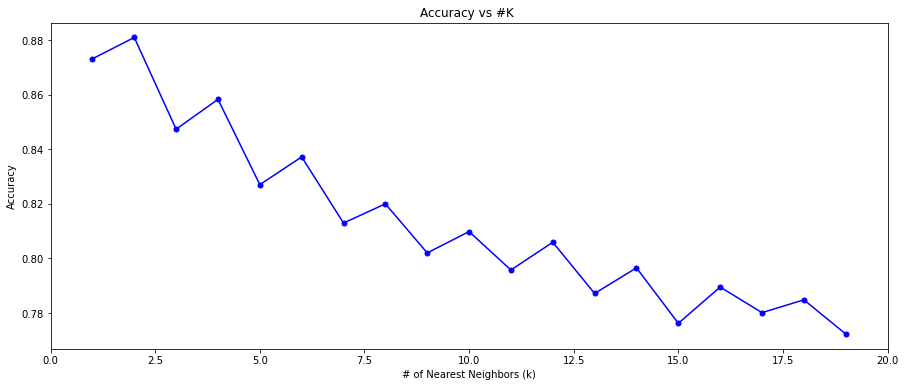

In [105]:
plt.figure(figsize = (15, 6))
plt.plot(range(1, 20), Accuracy, color = 'blue', marker ='o',
         markerfacecolor='blue', markersize = 5)
plt.xlim([0, 20])
plt.title('Accuracy vs #K ')
plt.xlabel('# of Nearest Neighbors (k)')
plt.ylabel('Accuracy')

# Different Feature Spaces

In [106]:
#age,hypertension,heart_disease,avg_glucose_level are chosen for different feature spaces             
                  
X_KNN = df.iloc[:,[0,1,2,3]]

y_KNN = df.stroke

In [107]:
#Split arrays or matrices into random train and test subsets with PCA model.

X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X_KNN, y_KNN, test_size = 0.25, random_state = 42)


#normalization

scaler = StandardScaler()

scaler.fit(X_train_KNN)

X_train_KNN = scaler.transform(X_train_KNN)

X_test_KNN = scaler.transform(X_test_KNN)

# SMOTE
oversample = SMOTE()

X_train_KNN, y_train_KNN  = oversample.fit_resample(X_train_KNN, y_train_KNN)

In [108]:
#Implement KNN Classifier

KNN = KNeighborsClassifier(n_neighbors = 3)

KNN.fit(X_train_KNN, y_train_KNN)

# Predicting the Test set results

y_pred_KNN = KNN.predict(X_test_KNN)

# Calculating Accuracy

score = accuracy_score(y_test_KNN, y_pred_KNN)

Accuracy = "{:.3f}".format(score)

print("Accuracy :", Accuracy)
print(classification_report(y_test_KNN, y_pred_KNN))

Accuracy : 0.811
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1215
           1       0.11      0.38      0.17        63

    accuracy                           0.81      1278
   macro avg       0.53      0.61      0.53      1278
weighted avg       0.92      0.81      0.86      1278



# Different Dimensionality Reduction Methods

### Principal Component Analysis (PCA) 

In [109]:
# n_components = Number of components to keep
from sklearn.decomposition import PCA

pca_model = PCA(n_components = 5)

pca_model.fit(X_train)

X_train_PCA = pca_model.transform(X_train)

X_test_PCA = pca_model.transform(X_test)


In [110]:
#Implement KNN Classifier

KNN = KNeighborsClassifier(n_neighbors = 5)

KNN.fit(X_train_PCA, y_train)

# Predicting the Test set results

y_pred = KNN.predict(X_test_PCA)


In [111]:
# Calculating Accuracy

score = accuracy_score(y_test, y_pred)

Accuracy = "{:.3f}".format(score)

print("Accuracy :", Accuracy)
print(classification_report(y_test, y_pred))

Accuracy : 0.826
              precision    recall  f1-score   support

           0       0.96      0.86      0.90      1215
           1       0.08      0.25      0.13        63

    accuracy                           0.83      1278
   macro avg       0.52      0.55      0.51      1278
weighted avg       0.91      0.83      0.86      1278



# Linear Discriminant Analysis (LDA)

In [112]:
# Classification with LDA method

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

LDA_model = LDA(n_components = 1)

LDA_model.fit(X_train, y_train)

X_train_LDA = LDA_model.transform(X_train)

X_test_LDA = LDA_model.transform(X_test)

print('Original feature #:', X_train.shape[1])

print('Reduced feature #:', X_train_LDA.shape[1])

Original feature #: 20
Reduced feature #: 1


In [113]:
#KNN Implementation after the LDA model

KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train_LDA, y_train)

y_pred = KNN.predict(X_test_LDA)

In [114]:
# Calculating Accuracy

score = accuracy_score(y_test, y_pred)

Accuracy = "{:.3f}".format(score)

print("Accuracy :", Accuracy)
print(classification_report(y_test, y_pred,zero_division=0))

Accuracy : 0.726
              precision    recall  f1-score   support

           0       0.97      0.73      0.84      1215
           1       0.11      0.63      0.19        63

    accuracy                           0.73      1278
   macro avg       0.54      0.68      0.51      1278
weighted avg       0.93      0.73      0.80      1278



# Naive Bayes Model (Using GaussianNB)

In [115]:
# Fit the train data into GaussianNB model

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [116]:
y_pred = gnb.predict(X_test)

In [117]:
# Compare predicted with actual results
# Calculate accuracy and confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix

ac = accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes model accuracy: ", ac)

cm = confusion_matrix(y_test, y_pred)
cm

Gaussian Naive Bayes model accuracy:  0.38028169014084506


array([[425, 790],
       [  2,  61]])

In [118]:
print("Number of mislabeled points out of total %d points: %d"
      %(X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of total 1278 points: 792


# Naive Bayes Model (Using Categorical NB)

In [119]:
# Discretize continuous variables (age, avg_glucose_level, bmi)
# Put into bins according to 25%, 50% and 75% quantiles
# Encode those features to dummy variables

df['age_bin'] = pd.cut(x = df['age'], bins = [0,25,45,61,82], labels = [0,1,2,3])
df = pd.get_dummies(df, columns=["age_bin"], drop_first=True)

df['avg_glucose_level_bin'] = pd.cut(x=df['avg_glucose_level'], bins = [0,77,92,114,272], labels = [0,1,2,3])
df = pd.get_dummies(df, columns=["avg_glucose_level_bin"], drop_first=True)

df['bmi_bin'] = pd.cut(x=df['bmi'], bins = [0,24,28,33,98], labels = [0,1,2,3])
df = pd.get_dummies(df, columns=["bmi_bin"], drop_first=True)

df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,smoking_status_smokes,age_bin_1,age_bin_2,age_bin_3,avg_glucose_level_bin_1,avg_glucose_level_bin_2,avg_glucose_level_bin_3,bmi_bin_1,bmi_bin_2,bmi_bin_3
0,0.08,0,0,139.67,14.1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0.08,0,0,70.33,16.9,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.16,0,0,114.71,17.4,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.16,0,0,69.79,13.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.16,0,0,109.52,13.9,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,82.00,0,0,96.98,21.5,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
5106,82.00,0,0,217.57,33.5,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
5107,82.00,0,0,113.45,30.3,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
5108,82.00,0,0,211.58,36.9,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1


In [120]:
# Drop columns with numerical features

df = df.drop("age", axis = 1)
df = df.drop("avg_glucose_level", axis = 1)
df = df.drop("bmi", axis = 1)

In [121]:
#drop the y (target) column from the dataset

x=df.drop("stroke",axis=1)
x

,hypertension,heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,...,smoking_status_smokes,age_bin_1,age_bin_2,age_bin_3,avg_glucose_level_bin_1,avg_glucose_level_bin_2,avg_glucose_level_bin_3,bmi_bin_1,bmi_bin_2,bmi_bin_3
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
5106,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
5107,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
5108,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1


In [122]:
y=df.stroke
y

0       0
1       0
2       0
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5109, dtype: int64

In [123]:
# Separate the data into train and test sets

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)
X_train

(3831, 26) (1278, 26)


,hypertension,heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,...,smoking_status_smokes,age_bin_1,age_bin_2,age_bin_3,avg_glucose_level_bin_1,avg_glucose_level_bin_2,avg_glucose_level_bin_3,bmi_bin_1,bmi_bin_2,bmi_bin_3
4000,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3576,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3033,1,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1868,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
494,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
466,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3093,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3773,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [124]:
# Fit the train data into categorical NB model

from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

CategoricalNB()

In [125]:
y_pred = cnb.predict(X_test)

In [126]:
# Compare predicted with actual results
# Calculate accuracy and confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix

ac = accuracy_score(y_test, y_pred)
print("Categorical Naive Bayes model accuracy: ", ac)

cm = confusion_matrix(y_test, y_pred)
cm

Categorical Naive Bayes model accuracy:  0.9006259780907668


array([[1138,   77],
       [  50,   13]])

In [127]:
print("Number of mislabeled points out of total %d points: %d"
      %(X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of total 1278 points: 127
